In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print('Shape of the dataset.')
print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, y_test.shape))

11490434/11490434 [==============================] - 1s 0us/step
Shape of the dataset.
Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


In [ ]:
train_labels_count = np.unique(y_train, return_counts=True)
test_labels_count = np.unique(y_test, return_counts=True)
dataframe_labels = pd.DataFrame({'Label':train_labels_count[0], 'Count Train':train_labels_count[1],'Count Test':test_labels_count[1]})
print(dataframe_labels.to_string(index=False))

 Label  Count Train  Count Test
     0         5923         980
     1         6742        1135
     2         5958        1032
     3         6131        1010
     4         5842         982
     5         5421         892
     6         5918         958
     7         6265        1028
     8         5851         974
     9         5949        1009


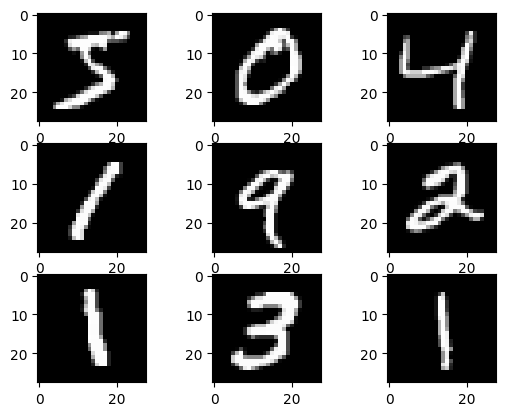

In [ ]:
for i in range(9):
	plt.subplot(331 + i)
	plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
plt.show()

In [ ]:
print('Train dataset ranges from ', X_train.min(),' to ', X_train.max(),'.')
print('Train dataset mean value:', round(X_train.mean(),3))
print('Test dataset ranges from ', X_test.min(),' to ', X_test.max(),'.')
print('Test dataset mean value: ', round(X_test.mean(),3))

Train dataset ranges from  0  to  255 .
Train dataset mean value: 33.318
Test dataset ranges from  0  to  255 .
Test dataset mean value:  33.791


In [ ]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')


X_train /= 255.0
X_test /= 255.0
print('Train dataset ranges from ', X_train.min(),' to ', X_train.max(),'.')
print('Train dataset mean value:', round(X_train.mean(),3))
print('Test dataset ranges from ', X_test.min(),' to ', X_test.max(),'.')
print('Test dataset mean value: ', round(X_test.mean(),3))

Train dataset ranges from  0.0  to  1.0 .
Train dataset mean value: 0.131
Test dataset ranges from  0.0  to  1.0 .
Test dataset mean value:  0.133


In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score

n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = to_categorical(y_train, n_classes)
Y_test = to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

model = Sequential()
model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(1,1)))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compiling the sequential model
# A loss function is one of the two mandatory arguments required for compiling a Keras model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')


model.fit(X_train, Y_train, batch_size=128, epochs=5, validation_data=(X_test, Y_test))


Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)
Epoch 1/5
469/469 [==============================] - 53s 111ms/step - loss: 0.1863 - accuracy: 0.9453 - val_loss: 0.0759 - val_accuracy: 0.9756
Epoch 2/5
469/469 [==============================] - 49s 104ms/step - loss: 0.0577 - accuracy: 0.9829 - val_loss: 0.0584 - val_accuracy: 0.9797
Epoch 3/5
469/469 [==============================] - 48s 103ms/step - loss: 0.0349 - accuracy: 0.9896 - val_loss: 0.0498 - val_accuracy: 0.9836
Epoch 4/5
469/469 [==============================] - 51s 109ms/step - loss: 0.0226 - accuracy: 0.9931 - val_loss: 0.0478 - val_accuracy: 0.9850
Epoch 5/5
469/469 [==============================] - 49s 104ms/step - loss: 0.0149 - accuracy: 0.9955 - val_loss: 0.0493 - val_accuracy: 0.9846


No. of values in test dataset:  10000
1/1 [==============================] - 0s 36ms/step


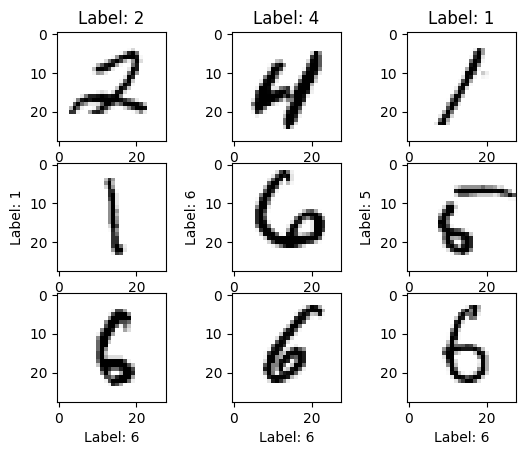

In [ ]:
import random as r
print('No. of values in test dataset: ',X_test.shape[0])
for i in range (9):
  image_index=r.randint(0,10000)
  plt.subplot(331 + i)
  plt.imshow(X_test[image_index].reshape(28, 28),cmap='Greys')
  pred = model.predict(X_test[image_index].reshape(1, 28, 28, 1))
  if i<3:
    plt.title('Label: ' + str(pred.argmax()))
  elif i>=3 and i<6:
    plt.ylabel('Label: ' + str(pred.argmax()))
  else:
    plt.xlabel('Label: ' + str(pred.argmax()))
plt.show()

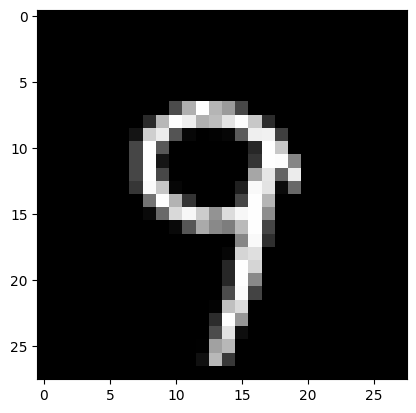

1/1 [==============================] - 0s 23ms/step
Keras inferences with 0.08873817920684815 second in average
[[2.3801180e-08 4.5669424e-07 3.8045047e-09 1.1639414e-05 3.3626740e-05
  1.0342613e-06 1.1118786e-12 6.3778092e-03 1.5609518e-05 9.9355972e-01]]
Predicted value: 9
Correct prediction !


In [ ]:
import time
expected_label=Y_test[2345].argmax()
digit_image = X_test[2345].reshape(1, 28, 28, 1)
# repeat few times to take the average execution time
loop_count = 10

image_index = 2345

plt.imshow(X_test[image_index], cmap='gray')
plt.show()
start_time = time.time()
for i in range(loop_count):
    prediction = model.predict(digit_image)
print("Keras inferences with %s second in average" %((time.time() - start_time) / loop_count))

print(prediction)
predicted_label = prediction.argmax()
print('Predicted value:', predicted_label)
if (expected_label == predicted_label):
  print('Correct prediction !')
else:
  print('Wrong prediction !')

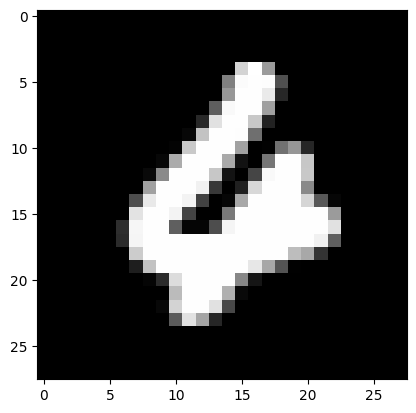

1/1 [==============================] - 0s 25ms/step
Keras inferences with 0.08354427814483642 second in average
[[3.7854098e-04 2.0492080e-05 1.5701150e-04 8.2381421e-06 7.5202006e-01
  2.5656901e-09 2.4740146e-01 2.9964164e-07 1.5340451e-07 1.3645187e-05]]
Predicted value: 4
Correct prediction !


In [ ]:
import time
expected_label=Y_test[1112].argmax()
digit_image = X_test[1112].reshape(1, 28, 28, 1)
loop_count = 10

image_index = 1112

plt.imshow(X_test[image_index], cmap='gray')
plt.show()
start_time = time.time()
for i in range(loop_count):
    prediction = model.predict(digit_image)
print("Keras inferences with %s second in average" %((time.time() - start_time) / loop_count))

print(prediction)
predicted_label = prediction.argmax()
print('Predicted value:', predicted_label)
if (expected_label == predicted_label):
  print('Correct prediction !')
else:
  print('Wrong prediction !')

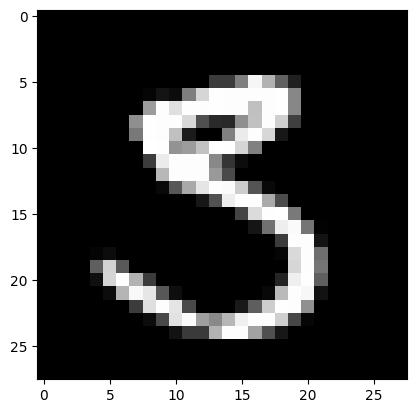

1/1 [==============================] - 0s 64ms/step

Keras inferences with 0.24364595413208007 seconds in average
Prediction:
[[4.5596214e-14 2.7149142e-12 7.2663143e-13 2.3508082e-01 5.1677456e-13
  7.6488507e-01 4.4332459e-12 1.8003770e-11 1.3814152e-05 2.0319436e-05]]
Predicted value: 5
Wrong prediction!


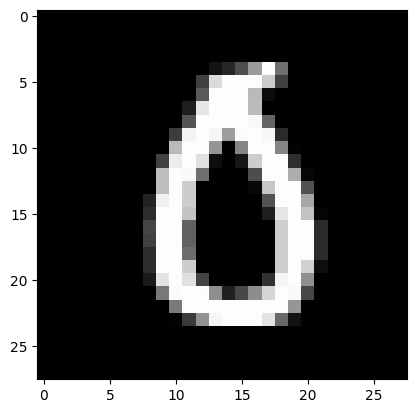

1/1 [==============================] - 0s 24ms/step

Keras inferences with 0.10001151561737061 seconds in average
Prediction:
[[9.9895442e-01 1.4585054e-07 7.7883442e-08 8.7922478e-09 8.0402911e-09
  5.6773081e-07 1.0096199e-03 5.0747173e-07 3.2706426e-05 1.9729937e-06]]
Predicted value: 0
Correct prediction!


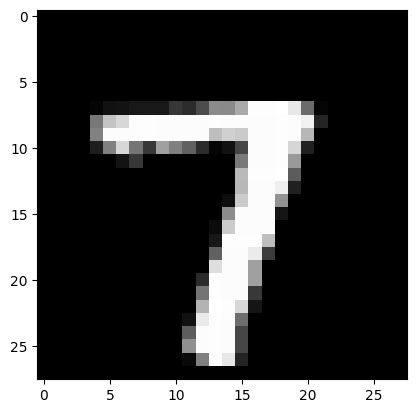

1/1 [==============================] - 0s 22ms/step

Keras inferences with 0.0875575065612793 seconds in average
Prediction:
[[1.38158061e-12 2.76587201e-07 1.64051350e-09 4.45130555e-09
  7.92640745e-11 4.84852772e-13 1.22921264e-17 9.99999762e-01
  8.68310535e-10 2.60312261e-09]]
Predicted value: 7
Correct prediction!


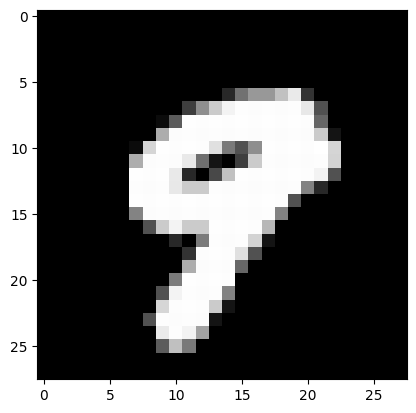

1/1 [==============================] - 0s 21ms/step

Keras inferences with 0.08384945392608642 seconds in average
Prediction:
[[1.1193824e-10 2.0913296e-10 1.7803929e-12 1.4089577e-08 4.2001698e-06
  2.4819067e-09 6.9352998e-13 6.0999382e-06 4.1761964e-06 9.9998546e-01]]
Predicted value: 9
Correct prediction!


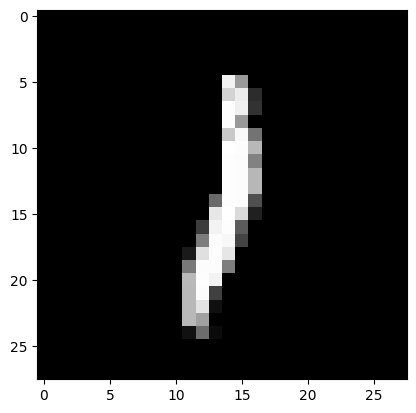

1/1 [==============================] - 0s 25ms/step

Keras inferences with 0.08633248805999756 seconds in average
Prediction:
[[1.9397032e-08 9.9997568e-01 4.3232157e-07 2.6697283e-10 1.9962295e-05
  1.8688049e-09 2.1621285e-09 3.7497205e-06 2.0379227e-07 2.0643414e-09]]
Predicted value: 1
Correct prediction!


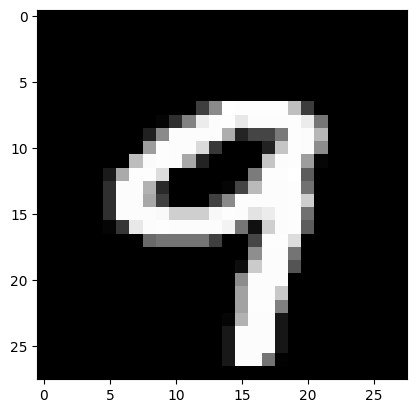

1/1 [==============================] - 0s 22ms/step

Keras inferences with 0.08489367961883545 seconds in average
Prediction:
[[1.1343672e-12 7.9357620e-13 8.5113129e-13 4.5574166e-07 8.5154760e-08
  7.5515594e-09 9.8350749e-15 3.9811086e-05 4.1410635e-09 9.9995959e-01]]
Predicted value: 9
Correct prediction!


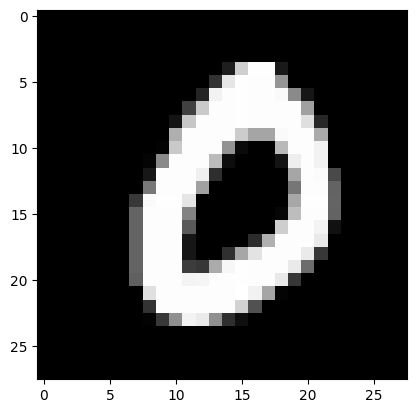

1/1 [==============================] - 0s 22ms/step

Keras inferences with 0.08757486343383789 seconds in average
Prediction:
[[9.9999189e-01 2.7006779e-08 3.8379035e-06 8.9250340e-10 9.8735176e-10
  7.5993774e-11 3.9936094e-06 7.1916051e-09 1.9723865e-08 2.2545575e-07]]
Predicted value: 0
Correct prediction!


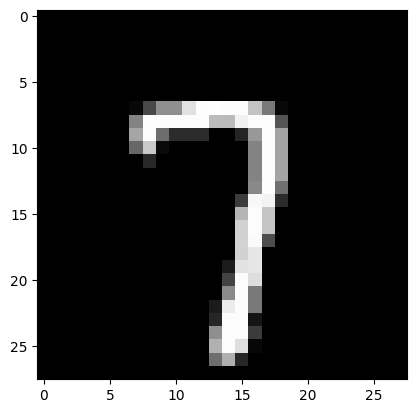

1/1 [==============================] - 0s 22ms/step

Keras inferences with 0.08698947429656982 seconds in average
Prediction:
[[6.3743866e-10 3.4493246e-07 2.7717990e-08 3.6316873e-08 1.6623007e-09
  3.9933165e-12 3.2361518e-15 9.9999607e-01 3.5664907e-10 3.6332704e-06]]
Predicted value: 7
Correct prediction!


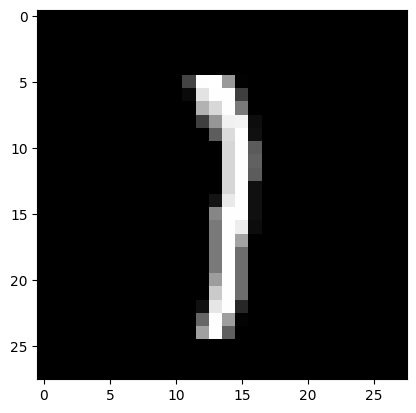

1/1 [==============================] - 0s 22ms/step

Keras inferences with 0.08822290897369385 seconds in average
Prediction:
[[3.6425401e-08 9.7847855e-01 2.1786444e-05 1.9274679e-05 1.1551129e-04
  6.9026066e-07 9.2905621e-11 2.1301195e-02 2.9707624e-05 3.3318527e-05]]
Predicted value: 1
Correct prediction!


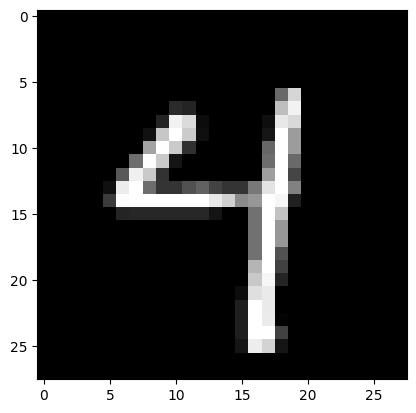

1/1 [==============================] - 0s 32ms/step

Keras inferences with 0.11444134712219238 seconds in average
Prediction:
[[8.3006511e-11 2.2318245e-07 2.8556238e-08 3.5409375e-08 9.8552310e-01
  1.0886274e-08 5.6260738e-12 9.9658398e-03 3.6050167e-08 4.5107966e-03]]
Predicted value: 4
Correct prediction!


In [ ]:
import random
random_indices = random.sample(range(len(X_test)), 10)

loop_count = 10

for image_index in random_indices:
    expected_label = Y_test[image_index].argmax()
    digit_image = X_test[image_index].reshape(1, 28, 28, 1)

    plt.imshow(X_test[image_index], cmap='gray')
    plt.show()

    start_time = time.time()
    for i in range(loop_count):
        prediction = model.predict(digit_image)
    average_inference_time = (time.time() - start_time) / loop_count

    print(f"\nKeras inferences with {average_inference_time} seconds in average")

    print("Prediction:")
    print(prediction)

    predicted_label = prediction.argmax()
    print('Predicted value:', predicted_label)

    if expected_label == predicted_label:
        print('Correct prediction!')
    else:
        print('Wrong prediction!')